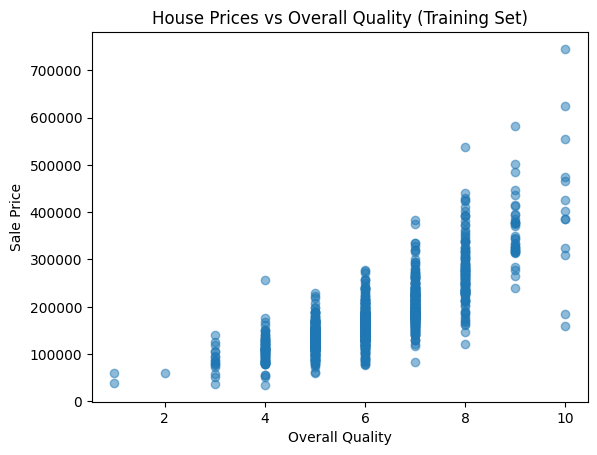

Iteration 5000: m=399364.8972501389, b=-45822.07208473833, MSE train=2283848676.334836, MSE test=2681144177.4848547


In [17]:
#start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Loading dataset
df = pd.read_csv(r"C:\Users\user\Desktop\house-price-predictor\Data\tron.csv")


# Using OverallQual
df = df[["OverallQual", "SalePrice"]].dropna()

x = df["OverallQual"].values.reshape(-1, 1)
y = df["SalePrice"].values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

df.head()
#Plot to see relationship
plt.scatter(xtrain, ytrain, alpha=0.5)
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.title("House Prices vs Overall Quality (Training Set)")
plt.show()

#parameters
m=0
b=0
lr=0.05
iterations=5000

#normalization
xmin,xmax=np.min(xtrain),np.max(xtrain)
xtrainnorm=(xtrain-xmin)/(xmax-xmin)
xtestnorm=(xtest-xmin)/(xmax-xmin)

#setting up lists to track train and test MSE
mselisttest=[]
mselisttrain=[]

#2D->1D
xtrainflat=xtrainnorm.flatten()
xtestflat=xtestnorm.flatten()

#starting
for i in range(1,iterations+1):
    ypredtrain=m*xtrainflat.flatten()+b
    mgrad=np.mean(xtrainflat*2*(xtrainflat*m+b-ytrain))
    bgrad=np.mean(2*(xtrainflat*m+b-ytrain))
    m=m-lr*mgrad
    b=b-lr*bgrad
    ypredtrain=m*xtrainflat+b
    msetrain=np.mean((ypredtrain-ytrain)**2)
    mselisttrain.append(msetrain)
    ypredtest=m*xtestflat+b
    msetest=np.mean((ypredtest-ytest)**2)
    mselisttest.append(msetest)
    ypred=m*xtrainflat+b

    if i == iterations:
        print(f"Iteration {i}: m={m}, b={b}, MSE train={msetrain}, MSE test={msetest}")

In [18]:
from sklearn.linear_model import LinearRegression

#train sklearn model
model=LinearRegression()
model.fit(xtrain,ytrain)
y_pred_sklearn=model.predict(xtest)

# Calculate MSE
mse_sklearn=np.mean((y_pred_sklearn-ytest)**2)
print(f"Sklearn MSE: {mse_sklearn}")

Sklearn MSE: 2681026163.5090904


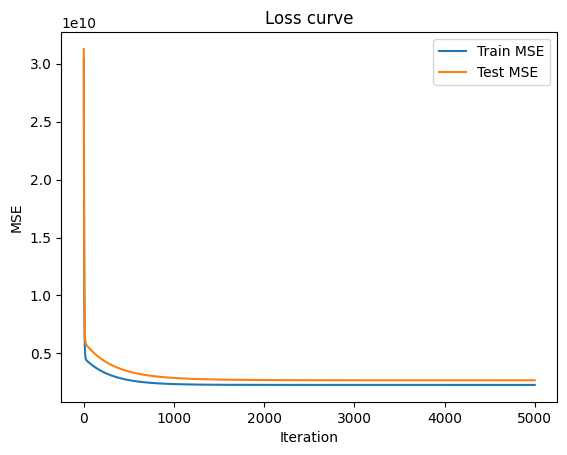

In [19]:
plt.plot(range(1,iterations+1), mselisttrain, label="Train MSE")
plt.plot(range(1,iterations+1), mselisttest, label="Test MSE")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss curve")
plt.legend()
plt.savefig("resultslosscurve.png")
plt.show()

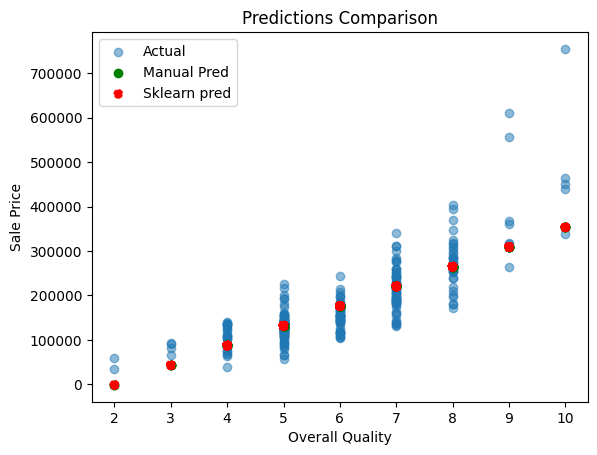

In [20]:
#predictions from manual model on test set
ypred_manual=m*xtestnorm.flatten()+b
plt.scatter(xtest,ytest,alpha=0.5,label="Actual")
plt.scatter(xtest,ypred_manual,color="green",label="Manual Pred")
plt.scatter(xtest,y_pred_sklearn,color="red",linestyle='--',label="Sklearn pred")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.title("Predictions Comparison")
plt.legend()
plt.savefig("resultspredictions_comparison.png")
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#training
model=LinearRegression()
model.fit(xtrain,ytrain)

#predicting
ytest_pred_sklearn=model.predict(xtest)
ytrain_pred_sklearn=model.predict(xtrain)

#calculate MSE
mse_train_sklearn=mean_squared_error(ytrain, ytrain_pred_sklearn)
mse_test_sklearn=mean_squared_error(ytest, ytest_pred_sklearn)

print(f"Sklearn Train MSE: {mse_train_sklearn}")
print(f"Sklearn Test MSE: {mse_test_sklearn}")

Sklearn Train MSE: 2283848608.7597637
Sklearn Test MSE: 2681026163.5090904


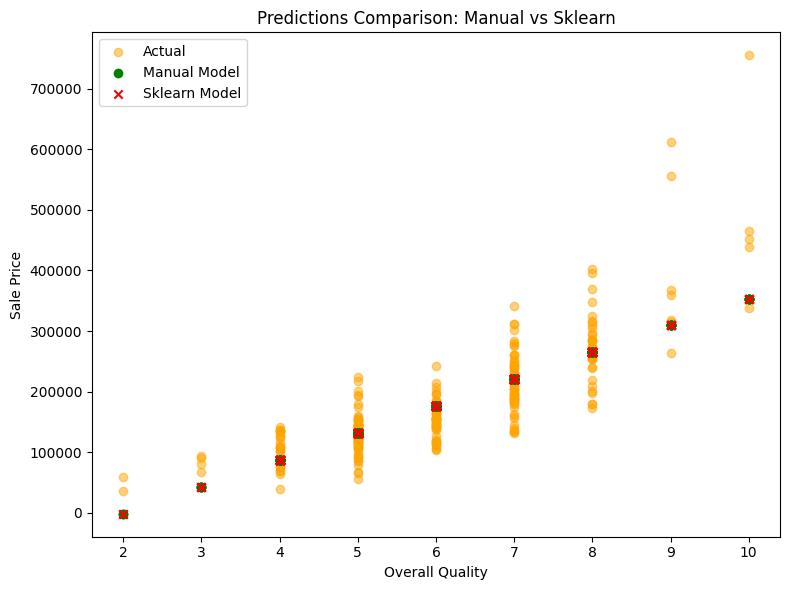

In [22]:
plt.figure(figsize=(8,6))

#actual test data
plt.scatter(xtest, ytest, alpha=0.5, label='Actual', color='orange')
#manual model pred
plt.scatter(xtest, ypredtest, color='green', label='Manual Model')

#Sklearn model predictions
plt.scatter(xtest, ytest_pred_sklearn, color='red', marker='x', label='Sklearn Model')
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.title("Predictions Comparison: Manual vs Sklearn")
plt.legend()
plt.tight_layout()
plt.savefig("resultspredictions_comparison.png")
plt.show()